In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls

binvox_rw.py		 demodata      meshplot
condacolab_install.log	 demodata.tgz  Project_Workspace.ipynb
DataVisualization.ipynb  meshobj.py    __pycache__


In [ ]:
!pwd

/content


In [ ]:
%cd content

[Errno 2] No such file or directory: 'content'
/root


In [2]:
%cd drive/MyDrive/ECE 544 Project/"VincentsWorkspace"

/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace


In [3]:
import os
os.chdir("/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace")
import sys
sys.path.append(".")
%autosave 60

Autosaving every 60 seconds


In [ ]:
!tar zxvf demodata.tgz

In [ ]:
%cd demodata

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata


In [ ]:
!ls

In [ ]:
%cd depth

[Errno 2] No such file or directory: 'depth'
/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata


In [ ]:
!ls

binvox_rw.py		 demodata      meshplot
condacolab_install.log	 demodata.tgz  Project_Workspace.ipynb
DataVisualization.ipynb  meshobj.py    __pycache__


In [ ]:
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 663 kB 33.0 MB/s 


In [ ]:
!python meshobj.py

In [ ]:
!pwd

/content


In [ ]:
!ls

binvox_rw.py		 demodata      meshplot
condacolab_install.log	 demodata.tgz  Project_Workspace.ipynb
DataVisualization.ipynb  meshobj.py    __pycache__


In [4]:
# DATALOADER
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import imageio
import skimage as io
import numpy as np
import re
import cv2
import tqdm
import glob

basedir = "/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata"
folders = os.listdir(basedir)
dataset_dict = {}
dataset_titles = []
item_list = []
for item in folders:
  if item == "data.txt":
    pass
  else:
    if os.listdir(basedir + '/' + item):
      if 'images' not in (os.listdir(basedir + '/' + item)):
        pass
      else:

        for title in (os.listdir(basedir + '/' + item + '/' + 'images')):
          #print(title)
          file_title = os.path.basename(basedir + '/' + item + '/' + 'images' + '/' + title[:6])
          dataset_titles.append(file_title)
          dataset_dict[file_title] = {}
          for image in os.listdir(basedir + '/' + item + '/' + 'images'):
            dataset_dict[file_title]['image'] = image
          for mask in os.listdir(basedir + '/' + item + '/' + 'visible'):
            dataset_dict[file_title]['mask'] = mask
          for depth in os.listdir(basedir + '/' + item + '/' + 'depth'):
            dataset_dict[file_title]['depth'] = depth
            
    item_list.append(item)

print(dataset_dict)

{'000557': {'image': '000557.bmp', 'mask': '000557.npy', 'depth': '000557.npy'}, '000254': {'image': '000254.bmp', 'mask': '000254.npy', 'depth': '000254.npy'}, '000094': {'image': '000094.bmp', 'mask': '000094.npy', 'depth': '000094.npy'}, '000169': {'image': '000665.bmp', 'mask': '000665.npy', 'depth': '000665.npy'}, '000665': {'image': '000665.bmp', 'mask': '000665.npy', 'depth': '000665.npy'}, '000118': {'image': '000118.bmp', 'mask': '000118.npy', 'depth': '000118.npy'}, '000413': {'image': '000413.bmp', 'mask': '000413.npy', 'depth': '000413.npy'}, '000597': {'image': '000597.bmp', 'mask': '000597.npy', 'depth': '000597.npy'}, '001123': {'image': '001123.bmp', 'mask': '001123.npy', 'depth': '001123.npy'}, '001197': {'image': '001197.bmp', 'mask': '001197.npy', 'depth': '001197.npy'}, '000150': {'image': '000163.bmp', 'mask': '000163.npy', 'depth': '000163.npy'}, '000378': {'image': '001368.bmp', 'mask': '001368.npy', 'depth': '001368.npy'}, '000449': {'image': '001016.bmp', 'mask

In [5]:
print(dataset_dict.keys())

dict_keys(['000557', '000254', '000094', '000169', '000665', '000118', '000413', '000597', '001123', '001197', '000150', '000378', '000449', '000768', '000971', '001016', '000241', '000415', '000688', '000129', '000237', '000947', '000954', '000040', '000357', '000178', '000320', '001056', '000273', '000182', '000323', '000260', '000056', '000157', '000180', '000033', '000101', '000608', '000225', '000087', '000347', '000354', '000428', '000826', '000856', '000034', '000049', '000022', '000058', '000367', '000572', '000117', '000198', '000217', '000384', '000039', '000275', '000776', '000797', '000366', '000012', '000834', '000289', '000538', '000807', '000163', '000208', '000220', '000293', '000375', '000488', '000583', '000306', '000379', '000332', '001010', '000185', '000006', '000057', '000896', '000020', '000184', '000666', '000940', '000305', '000160', '000612', '000658', '001043', '000176', '000187', '000520', '000671', '000218', '000290', '000351', '000474', '000018', '000224',

In [6]:
folder = 'demodata/'
gt_oplane_dict = {}
with open(folder+'data.txt') as f:
    lines = f.read().splitlines()
    #obj_list.append(lines)
#line = lines[1].split(',')[0]
substring = "_mesh"
comma_substring = ","
for line in lines:
  line = line[1:]
  #print(line)
  #break
  image_name = line[line.find(substring)-6:line.find(substring)]
  line = line[:line.find(comma_substring)]
  gt_oplane_dict[image_name] = line

In [7]:
print(len(gt_oplane_dict))
print(gt_oplane_dict['000542'])

311
/lamar_1_int/0022_Ped_000001162230285_000000000742445_00/000542_mesh/mesh.obj


In [ ]:
print(len(gt_oplane_dict))
print(len(dataset_dict))

311
311


In [ ]:
for item in gt_oplane_dict:
  print(item, gt_oplane_dict[item])
  #if item in dataset_dict:
    

In [ ]:
print(dataset_list)

[['/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fin_ext_p1/images/000557.bmp', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fin_ext_p1/visible/000557.npy', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fin_ext_p1/depth/000557.npy', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fin_ext_p1//fin_ext_p1/0001_Ped_000000225514697_000000000021792_00/000557_mesh/mesh.obj'], ['/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/maude_mcs_1/images/000254.bmp', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/maude_mcs_1/visible/000254.npy', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/maude_mcs_1/depth/000254.npy', '/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/maude_mcs_1//maude_mcs_1/0006_Ped_000003166991819_000000000421986_00/000254_mesh/mesh.obj'], ['/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fbi_3_mcs_4p2/images

In [ ]:
import csv
for item in gt_oplane_dict:
  #print([gt_oplane_dict[item]])
  with open('gt_oplane.csv', 'a') as file:
    writer = csv.writer(file)
    writer.writerow(['.' + gt_oplane_dict[item]])

In [ ]:
import pandas as pd

df = pd.read_csv("gt_oplane.csv")
print(df)

    ./lamar_1_int/0022_Ped_000001162230285_000000000742445_00/000542_mesh/mesh.obj
0    ./fam_5_mcs_6/0029_Ped_000002825402133_0000000...                            
1    ./mic_1_mcs_2/0012_Ped_000000402729631_0000000...                            
2    ./lsdh_2a_int/0033_Ped_000002608926626_0000000...                            
3    ./drf_mic_3_cs_1/0040_Ped_000002745392175_0000...                            
4    ./trv_5_int/0146_Ped_000003973074921_000000000...                            
..                                                 ...                            
305  ./fam_6_mcs_6/0005_Ped_000000225514697_0000000...                            
306  ./bs_2a_int/0016_Ped_000002602752943_000000000...                            
307  ./lsdh_2a_ext/0007_Ped_000002602752943_0000000...                            
308  ./tmom_1_rcm/0014_Ped_000003422397391_00000000...                            
309  ./mph_pri_fin_mcs1/0008_Ped_000001885233650_00...                            

[31

In [ ]:
folder = 'demodata/'
obj_list = []
with open(folder+'data.txt') as f:
    lines = f.read().splitlines()
    #obj_list.append(lines)
line = lines[1].split(',')[0]
print(line)

./sol_3_int/0005_Ped_000001167167044_000000000263175_00/000087_mesh/mesh.obj


In [ ]:
print(basedir)

/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata


In [8]:

from scipy.constants.constants import G
# create image, depth, and visible csv files
import csv
import os

basedir = "/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata"
kaggle_dir = "/kaggle/working/demodata"
folders = os.listdir(basedir)
dataset_list = []
title_list = []
dataset_dict = {}
for idx,item in enumerate(folders):
  #print(item)
  if item == "data.txt":
    pass
  else:
    if os.listdir(basedir + '/' + item):
      if 'images' not in (os.listdir(basedir + '/' + item)):
        pass
      else:
        for title in os.listdir(basedir + '/' + item + '/' + 'images'):
          temp_list = []
          img_id = title[:6]
          title_list.append(title)
          #temp_list.append(title)
          temp_list.append(kaggle_dir + '/' + item + '/' + 'images' + '/' + title)    
          #print(basedir + '/' + item + '/' + 'visible' + '/' + img_id + '.' + 'npy')
          #print(img_id)
          if (img_id + '.' + 'npy') in os.listdir(basedir + '/' + item + '/' + 'visible'):
            temp_list.append(kaggle_dir + '/' + item + '/' + 'visible' + '/' + img_id + '.' + 'npy')
            #temp_list.append(img_id + '.' + 'npy')

          if (img_id + '.' + 'npy') in os.listdir(basedir + '/' + item + '/' + 'depth'):
            temp_list.append(kaggle_dir + '/' + item + '/' + 'depth' + '/' + img_id + '.' + 'npy')
            #print(basedir + '/' + item + '/' + 'depth' + '/' + img_id + '.' + 'npy')
            #temp_list.append(img_id + '.' + 'npy')
          if img_id in gt_oplane_dict:
            #gt_oplane_dict[img_id] = gt_oplane_dict[img_id].replace(img_id, ' ')
            #s = s.replace('fin_ext_p1', '')
            #s = s.replace('//', './')
            #print(gt_oplane_dict[img_id])
            temp_list.append('.' + gt_oplane_dict[img_id])
            #print('.' + gt_oplane_dict[img_id])
            #break
            with open('inputs_kaggle.csv', 'a') as file:
                writer = csv.writer(file)
                writer.writerow(temp_list)
          dataset_list.append(temp_list)
          dataset_dict[img_id] = temp_list
        #  #print(temp_list)
            #break



In [ ]:
print(gt_oplane_dict[img_id])

In [ ]:
for item in dataset_dict:
  print(item, dataset_dict[item])

In [ ]:
sorted_list = sorted(title_list)
print(len(sorted_list))

358


In [ ]:
for item in sorted_list:
  if sorted_list.count(item) > 1:
    print(item)

In [ ]:
print(len(dataset_list))

358


In [ ]:
for x in dataset_list:
  print(x)

In [ ]:
# DATALOADER
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, base_dir, gt_oplanes_dir, img_dir, depth_dir, visible_dir,transform=None, target_transform=None):
        self.base_dir = base_dir
        self.gt_oplanes = gt_oplanes_dir
        self.img_dir = img_dir
        self.depth_dir = depth_dir
        self.visible_dir = visible_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

    def add_channels(self, )



        return image, label

In [ ]:
!ls

binvox_rw.py		 demodata      meshplot
condacolab_install.log	 demodata.tgz  Project_Workspace.ipynb
DataVisualization.ipynb  meshobj.py    __pycache__


In [ ]:
%cd fin_c_int

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_c_int


In [ ]:
print(dataset_dict['000957'])

{'image': '000957.bmp', 'mask': '000957.npy', 'depth': '000957.npy'}


In [ ]:
print(basedir)

/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata


In [ ]:
import cv2
image_size = (512,512)
orig_dim = (1280,800)
image_name = dataset_dict['000957']['image']
image_dir = basedir + '/' + 'fin_c_int' + '/' + 'images'
print(image_name, image_dir)
image = cv2.imread(os.path.join(image_dir, image_name))
print(image.size)
image_resized = cv2.resize(image, image_size, interpolation=cv2.INTER_LINEAR)
print(image_resized.shape)
#print(image_resized[0])
#plt.imshow(image_resized)

000957.bmp /content/drive/MyDrive/ECE 544 Project/VincentsWorkspace/demodata/fin_c_int/images
3072000
(512, 512, 3)


In [ ]:
print(image_resized.shape)
gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
print(gray_image.shape)

(512, 512, 3)
(512, 512)


In [ ]:
print(image_resized[0])
print(gray_image[0])

In [ ]:
import scipy.ndimage
euclidean_distance = scipy.ndimage.distance_transform_edt(gray_image)
print(euclidean_distance[0])

In [ ]:
%cd visible

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_c_int/visible


In [ ]:
!pwd

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata


In [ ]:
!python -m pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import scipy
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import imageio
import skimage as io
import numpy as np
import re
import cv2
import tqdm
import glob

In [ ]:
!pwd

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_c_int/visible


In [ ]:
%cd visible/

[Errno 2] No such file or directory: 'visible/'
/content/drive/MyDrive/ECE 544 Project/VincentsWorkspace


Extra Steps to make Input images 5 channels:


```
1) for each pixel, we compute the distance to the visibility mask’s boundary; 
2) we detect edges with the help of a Farid filter (https://www.cns.nyu.edu/pub/lcv/farid03-reprint.pdf)
```







In [ ]:
import scipy.ndimage
array = np.load("000957.npy")
#for idx,item in enumerate(array):
#  for idx2,item2 in enumerate(item):
#    if item2 > 0:
#      array[idx][idx2] = 255

#plt.imshow(array)
print(array[799])
print(array.shape)
gray_image = cv2.cvtColor(array, cv2.COLOR_BGR2GRAY)
euclidean_distance = scipy.ndimage.distance_transform_edt(array)
plt.figure()
plt.imshow(euclidean_distance)
resized_ed = cv2.resize(euclidean_distance, (512, 512), interpolation=cv2.INTER_AREA)
plt.figure()
plt.imshow(resized_ed)
euclidean_distance = euclidean_distance.reshape(800,1280,1)

FileNotFoundError: ignored

(512, 512, 3) (512, 512, 1)


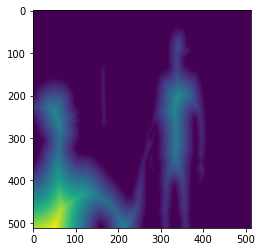

In [ ]:
import torch
resized_ed = cv2.resize(euclidean_distance, (512, 512), interpolation=cv2.INTER_AREA)
plt.imshow(resized_ed)
resized_ed = torch.from_numpy(resized_ed).unsqueeze(-1)
resized_ed = resized_ed.cpu().detach().numpy()
print(image_resized.shape, resized_ed.shape)

In [ ]:
concatenated_input = np.concatenate((image_resized,resized_ed), axis=2)
print(concatenated_input.shape)

(512, 512, 4)


In [ ]:
# edge detection using farid filter
from skimage import filters
edges = filters.farid(gray_image)
#edges = edges.reshape(800,1280,1)
print(edges.shape)
plt.imshow(edges)

NameError: ignored

(512, 512, 4) (512, 512, 1)


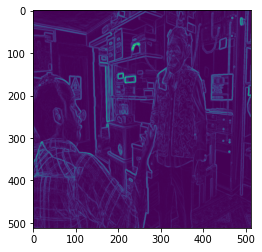

In [ ]:
# resize edge map
import torch
resized_edges = cv2.resize(edges, (512, 512), interpolation=cv2.INTER_AREA)
plt.imshow(resized_edges)
resized_edges = torch.from_numpy(resized_edges).unsqueeze(-1)
resized_edges = resized_edges.cpu().detach().numpy()
print(concatenated_input.shape, resized_edges.shape)

In [ ]:
concatenated_input = np.concatenate((concatenated_input,resized_edges), axis=2)
print(concatenated_input.shape)

(512, 512, 5)


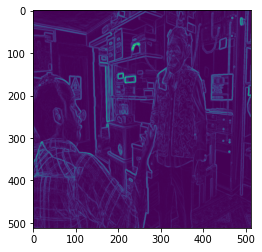

In [ ]:
plt.imshow(edges)

In [ ]:
print(edges)
plt.imshow(edges)
resized = cv2.resize(edges, (512, 512), interpolation=cv2.INTER_AREA)
plt.imshow(resized)
print(resized.shape)
print(resized)

In [ ]:
concatenated_input = np.concatenate((concatenated_input,euclidean_distance), axis=2)
print(concatenated_input.shape)

In [ ]:
print(concatenated_input[:,:,3:].max())

266.64604813614966


In [ ]:
print(concatenated_input.shape)

(512, 512, 5)


In [ ]:
import cv2
image_size = (512,512)
orig_dim = (1280,800)
image_name = dataset_dict['000957']['image']
image_dir = basedir + '/' + 'fin_c_int' + '/' + 'images'
image = cv2.imread(os.path.join(image_dir, image_name))
print(image.size)
image_resized = cv2.resize(image, orig_dim, interpolation=cv2.INTER_LINEAR)
print(image_resized.shape)

3072000
(800, 1280, 3)


In [ ]:
%cd /content

/content


In [ ]:
!pwd

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_c_int/visible


In [ ]:
# MESH OBJECTS
folder = 'demodata/'
obj_list = []
with open(folder+'data.txt') as f:
    lines = f.read().splitlines()
    obj_list.append(lines)

FileNotFoundError: ignored

In [ ]:
data = MeshObj(line,max_depth_range,mesh_data_root,binvoxPathPrefix,extra_mesh_data_root)

In [ ]:
!ls

000013.npy  000957.npy


In [ ]:
!ls

 444_MP3				    'Quiz4 _reviewer.docx'
 444_MP4				     resume_uiuc.pdf
 444_MP5				     softmax.py
 assignment2				     svm.py
'Colab Notebooks'			     t10k-images-idx3-ubyte.gz
'Copy of CS444 Assignment 3 Template.gdoc'   t10k-images-idx3-ubyte.gz.1
 CS444_Project				     t10k-labels-idx1-ubyte.gz
'data_process (1).py'			     t10k-labels-idx1-ubyte.gz.1
 develop_neural_network.ipynb		     train-images-idx3-ubyte.gz
'ECE 537 Project'			     train-images-idx3-ubyte.gz.1
'ECE 544 Project'			     train-labels-idx1-ubyte.gz
'ENG 572'				     train-labels-idx1-ubyte.gz.1
 get_data.sh				     UIUC_unofficialtranscript.pdf
 __init__.py				    'Untitled document.gdoc'
'kaggle_submission (1).py'		     X_test.npy
'kaggle_submission (2).py'		     X_train.npy
 logistic.py				     y_test.npy
 neural_network.ipynb			     y_train.npy
 perceptron.py


In [ ]:
!pwd

/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace


In [ ]:
obj_list = []
with open('inputs.csv') as f:
    lines = f.read().splitlines()
    obj_list.append(lines)

print(obj_list)

[["/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_ext_p1/images/000557.bmp,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_ext_p1/visible/000557.npy,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_ext_p1/depth/000557.npy,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fin_ext_p1//fin_ext_p1/0001_Ped_000000225514697_000000000021792_00/000557_mesh/mesh.obj", "/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/maude_mcs_1/images/000254.bmp,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/maude_mcs_1/visible/000254.npy,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/maude_mcs_1/depth/000254.npy,/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/maude_mcs_1//maude_mcs_1/0006_Ped_000003166991819_000000000421986_00/000254_mesh/mesh.obj", "/content/drive/MyDrive/ECE 544 Project/Vincent's Workspace/demodata/fbi_3_mcs_4p2/images/000

In [ ]:
# DATALOADER
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, base_dir, gt_oplanes_dir, img_dir, depth_dir, visible_dir,transform=None, target_transform=None):
        self.base_dir = base_dir
        self.gt_oplanes = gt_oplanes_dir
        self.img_dir = img_dir
        self.depth_dir = depth_dir
        self.visible_dir = visible_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]

    def add_channels(self, )



        return image, label

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")